In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [5]:
digits = load_digits()
print("Image Data shape.", digits.data.shape)
print("Label Data shape.", digits.target.shape)

Image Data shape. (1797, 64)
Label Data shape. (1797,)


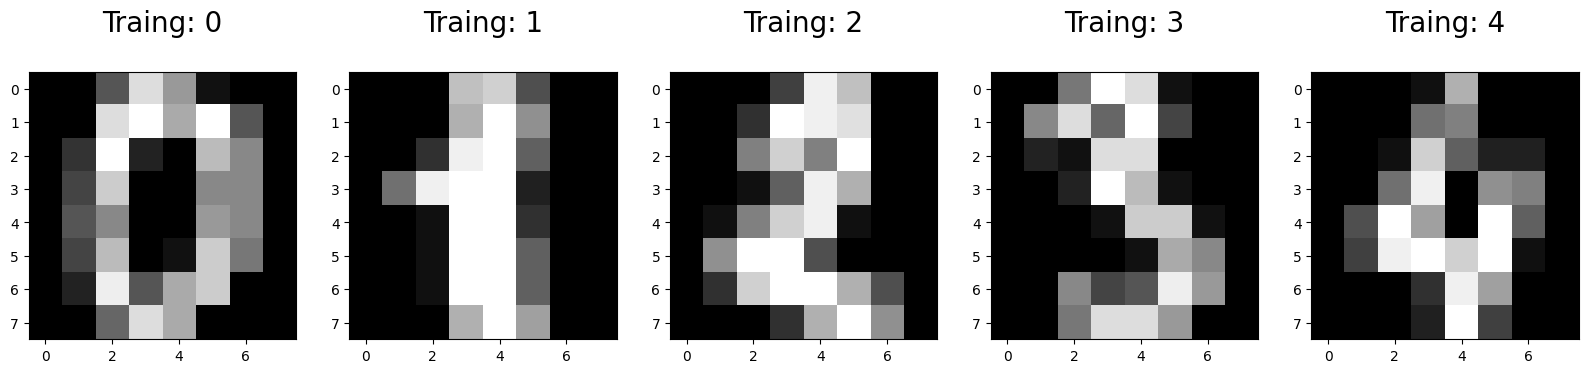

In [7]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5, index+1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title("Traing: %i\n" % label, fontsize=20)

In [10]:
x_train,x_test, y_train, y_test= train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(1383, 64) (414, 64) (1383,) (414,)


In [12]:
 logisticRegression = LogisticRegression()
 logisticRegression.fit(x_train,y_train)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
# Prediction for one observation
print(logisticRegression.predict(x_test[0].reshape(1,-1)))

[4]


In [14]:
# Prediction for multiple observations at once
print(logisticRegression.predict(x_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


In [15]:
predictions = logisticRegression.predict(x_test)

In [16]:
score = logisticRegression.score(x_test, y_test)
print(score)

0.9516908212560387


In [17]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: 0.9516908212560387')

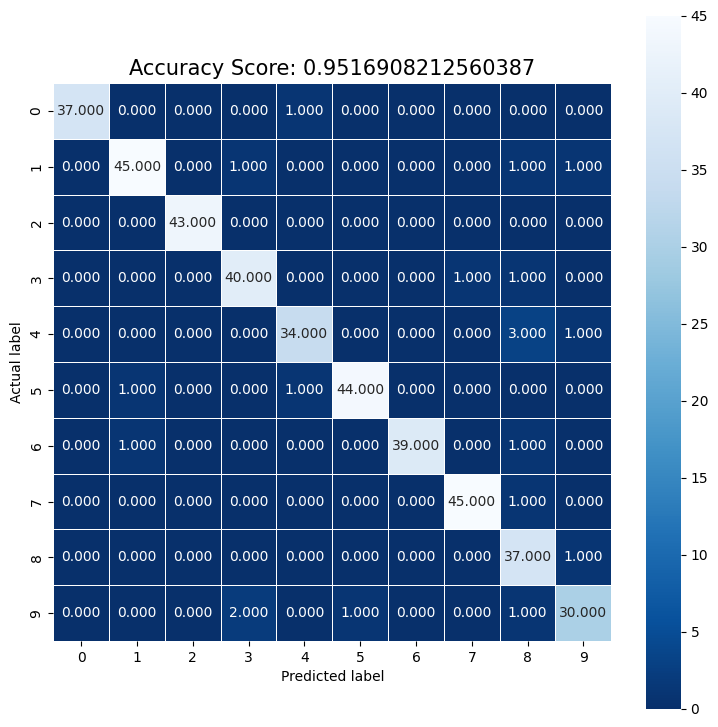

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title = "Accuracy Score: {0}".format(score)
plt.title(all_sample_title, size=15)

# Max number should be on diagonal


#### Testing

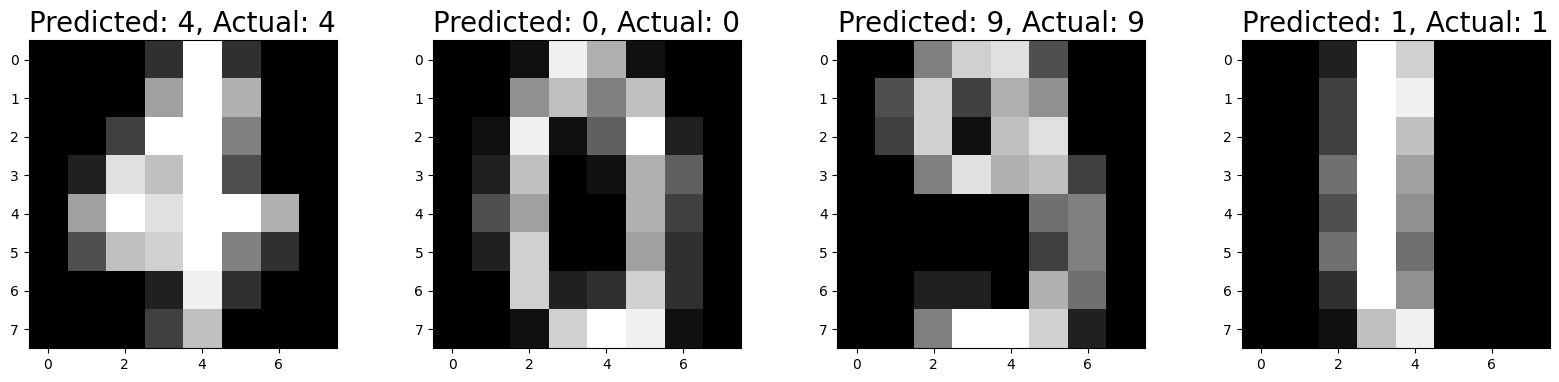

In [20]:
index = 0
classficationIndex = []
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        classficationIndex.append(index)
    index += 1

plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(classficationIndex[0:4]):
    plt.subplot(1,4, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize=20)